## Spatio-Temporal Analysis of Road Traffic Crashes in Kenya: Evidence from Geo-Referenced Accident Report

### PHASE 1: Environment Setup


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
!pip install folium


In [3]:
import folium


## PHASE 2: Data Loading & Inspection


In [4]:
df = pd.read_csv("ma3route_crashes_manualcode.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   crash_id                   2595 non-null   int64  
 1   crash_datetime             2595 non-null   object 
 2   crash_date                 2595 non-null   object 
 3   latitude                   2595 non-null   float64
 4   longitude                  2595 non-null   float64
 5   n_crash_reports            2595 non-null   int64  
 6   contains_fatality_words    2595 non-null   int64  
 7   contains_pedestrian_words  2595 non-null   int64  
 8   contains_matatu_words      2595 non-null   int64  
 9   contains_motorcycle_words  2595 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 202.9+ KB


,crash_id,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
count,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000
mean,1573.075530,-1.271065,36.861475,1.583815,0.063969,0.023507,0.080539,0.036609
std,912.156283,0.281333,0.305962,2.421514,0.244745,0.151536,0.272179,0.187836
min,1.000000,-4.059868,34.145808,1.000000,0.000000,0.000000,0.000000,0.000000
25%,729.500000,-1.319624,36.807140,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1644.000000,-1.269274,36.854319,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2292.500000,-1.234151,36.899491,1.000000,0.000000,0.000000,0.000000,0.000000
max,3115.000000,1.257331,40.171389,67.000000,1.000000,1.000000,1.000000,1.000000


### PHASE 3: Data Cleaning & Feature Engineering

In [5]:
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])
df['crash_date'] = pd.to_datetime(df['crash_date'])


Extract time features

In [6]:
df['hour'] = df['crash_datetime'].dt.hour
df['day_of_week'] = df['crash_datetime'].dt.day_name()
df['month'] = df['crash_datetime'].dt.month


### PHASE 4: Descriptive Analysis

Accident frequency

In [7]:
df.shape[0]


2595

Fatal vs non-fatal

In [8]:
df['contains_fatality_words'].value_counts(normalize=True) * 100


contains_fatality_words
0    93.603083
1     6.396917
Name: proportion, dtype: float64

Pie chart

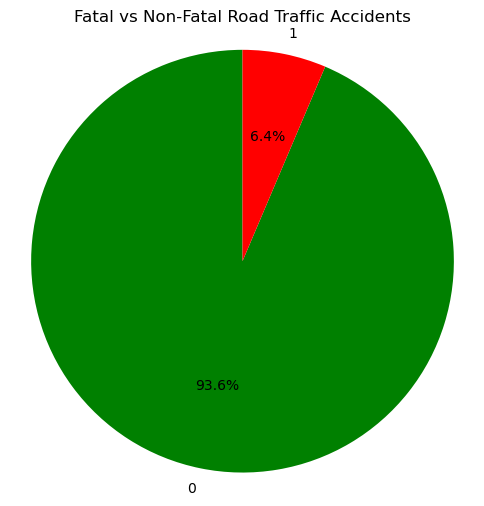

In [9]:
counts = df['contains_fatality_words'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
        colors=['green', 'red'])
plt.title('Fatal vs Non-Fatal Road Traffic Accidents')
plt.axis('equal')

plt.show()

In [10]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load dataset
#df = pd.read_csv('/mnt/data/824d9b24-e377-43ab-ad53-fe9cfd45a58b.csv')

# Helper function to create pie charts
def plot_user_severity(user_col, user_label):
    subset = df[df[user_col] == 1]
    severity = subset['contains_fatality_words'].map({1:'Fatal', 0:'Non-Fatal'}).value_counts()
    
    plt.figure(figsize=(5,5))
    plt.pie(
        severity,
        labels=[f"{label} ({count})" for label, count in zip(severity.index, severity.values)],
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"{user_label} Crash Severity (Fatal vs Non-Fatal)")
    plt.show()
    print(f"Total {user_label} Crashes:", len(subset))
    print(severity, "\n")


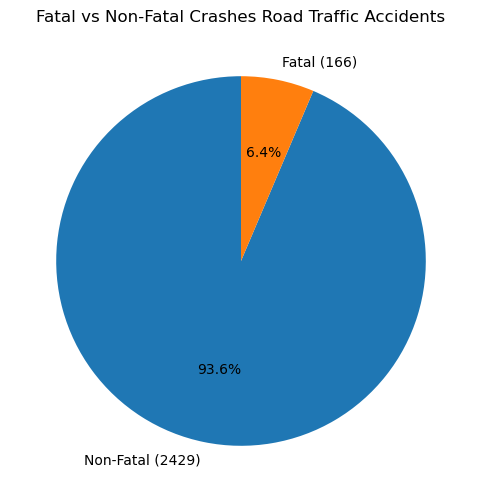

In [11]:


# Convert severity indicator to labels
severity = df['contains_fatality_words'].map({1:'Fatal', 0:'Non-Fatal'}).value_counts()

# Create pie chart with counts + percentages
plt.figure(figsize=(6,6))
plt.pie(
    severity,
    labels=[f"{label} ({count})" for label, count in zip(severity.index, severity.values)],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Fatal vs Non-Fatal Crashes Road Traffic Accidents")
plt.show()


In [12]:


# Road user counts from indicator columns
road_user_counts = {
    'Pedestrian': df['contains_pedestrian_words'].sum(),
    'Matatu': df['contains_matatu_words'].sum(),
    'Motorcycle': df['contains_motorcycle_words'].sum()
}

print("🚗 Number of Crashes by Road User:")
print(pd.Series(road_user_counts))


🚗 Number of Crashes by Road User:
Pedestrian     61
Matatu        209
Motorcycle     95
dtype: int64


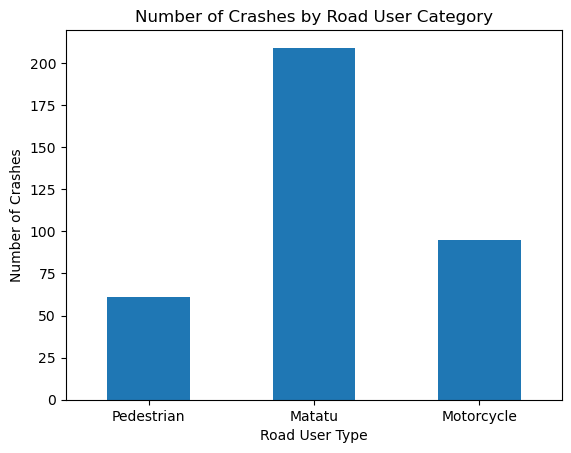

In [13]:
#import matplotlib.pyplot as plt

pd.Series(road_user_counts).plot(kind='bar')
plt.title("Number of Crashes by Road User Category")
plt.xlabel("Road User Type")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=0)
plt.show()


In [ ]:
fatal_vs_nonfatal = df['contains_fatality_words'].map({1:'Fatal', 0:'Non-Fatal'}).value_counts()

print("\n☠️ Fatal vs Non-Fatal Crashes:")
print(fatal_vs_nonfatal)



☠️ Fatal vs Non-Fatal Crashes:
contains_fatality_words
Non-Fatal    2429
Fatal         166
Name: count, dtype: int64


In [ ]:
#import pandas as pd

#df = pd.read_csv('/mnt/data/824d9b24-e377-43ab-ad53-fe9cfd45a58b.csv')

unclassified_fatal = df[
    (df['contains_fatality_words'] == 1) &
    (df[['contains_pedestrian_words', 'contains_matatu_words', 'contains_motorcycle_words']].sum(axis=1) == 0)
]

print("Fatal crashes with NO category:", len(unclassified_fatal))


Fatal crashes with NO category: 114


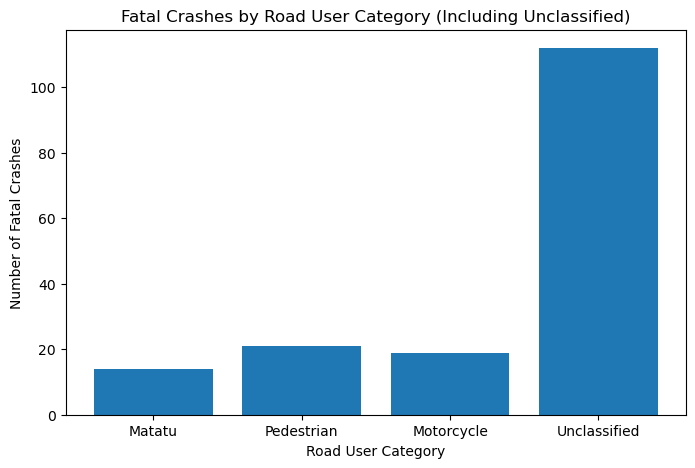

Fatal Crash Breakdown:
Matatu: 14
Pedestrian: 21
Motorcycle: 19
Unclassified: 112

Total Fatal Crashes: 166


In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load data
#df = pd.read_csv('/mnt/data/824d9b24-e377-43ab-ad53-fe9cfd45a58b.csv')

# Fatal crashes filtered
fatal = df[df['contains_fatality_words'] == 1]

# Count fatalities per user type
matatu_fatal = fatal['contains_matatu_words'].sum()
pedestrian_fatal = fatal['contains_pedestrian_words'].sum()
motorcycle_fatal = fatal['contains_motorcycle_words'].sum()

# Fatal crashes with NO identified category
unclassified_fatal = len(fatal) - (matatu_fatal + pedestrian_fatal + motorcycle_fatal)

# Create dataset for chart
labels = ['Matatu', 'Pedestrian', 'Motorcycle', 'Unclassified']
values = [matatu_fatal, pedestrian_fatal, motorcycle_fatal, unclassified_fatal]

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.title("Fatal Crashes by Road User Category (Including Unclassified)")
plt.xlabel("Road User Category")
plt.ylabel("Number of Fatal Crashes")
plt.show()

# Print summary counts
print("Fatal Crash Breakdown:")
for l, v in zip(labels, values):
    print(f"{l}: {v}")
print("\nTotal Fatal Crashes:", sum(values))


Vehicle involvement

In [ ]:
df[['contains_pedestrian_words',
    'contains_matatu_words',
    'contains_motorcycle_words']].mean()*100


contains_pedestrian_words    2.350674
contains_matatu_words        8.053950
contains_motorcycle_words    3.660886
dtype: float64

<Figure size 800x600 with 0 Axes>

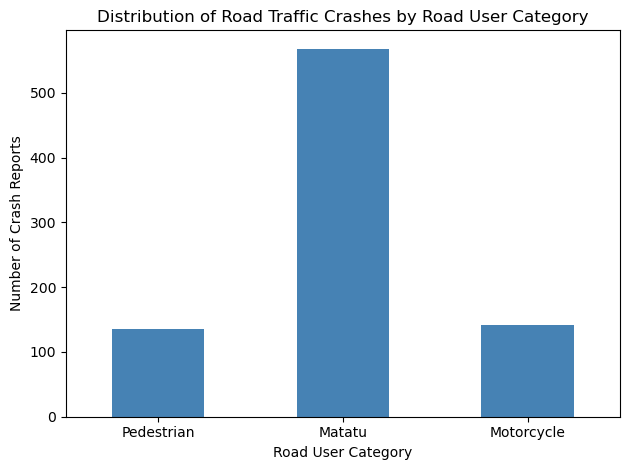

In [ ]:
# Sum crashes for each road user category
categories = {
    'Pedestrian': df.loc[df['contains_pedestrian_words'] == 1, 'n_crash_reports'].sum(),
    'Matatu': df.loc[df['contains_matatu_words'] == 1, 'n_crash_reports'].sum(),
    'Motorcycle': df.loc[df['contains_motorcycle_words'] == 1, 'n_crash_reports'].sum()
}

# Convert to DataFrame
category_df = pd.DataFrame.from_dict(categories, orient='index', columns=['Number of Crashes'])

# Plot bar chart
plt.figure(figsize=(8, 6))
category_df.plot(kind='bar', legend=False, color='steelblue')

plt.title('Distribution of Road Traffic Crashes by Road User Category')
plt.xlabel('Road User Category')
plt.ylabel('Number of Crash Reports')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


### CORRELATION ANALYSIS

In [ ]:
corr_df = df[
    ['contains_fatality_words',
     'contains_pedestrian_words',
     'contains_motorcycle_words',
     'contains_matatu_words',
     'n_crash_reports',
     'hour']
]


In [ ]:
correlation_matrix = corr_df.corr(method='pearson')
correlation_matrix


,contains_fatality_words,contains_pedestrian_words,contains_motorcycle_words,contains_matatu_words,n_crash_reports,hour
contains_fatality_words,1.000000,0.177723,0.108367,0.003648,0.182839,-0.000516
contains_pedestrian_words,0.177723,1.000000,0.010386,0.019508,0.040329,0.013532
contains_motorcycle_words,0.108367,0.010386,1.000000,-0.004911,-0.008020,0.002423
contains_matatu_words,0.003648,0.019508,-0.004911,1.000000,0.138613,-0.036443
n_crash_reports,0.182839,0.040329,-0.008020,0.138613,1.000000,-0.060439
hour,-0.000516,0.013532,0.002423,-0.036443,-0.060439,1.000000


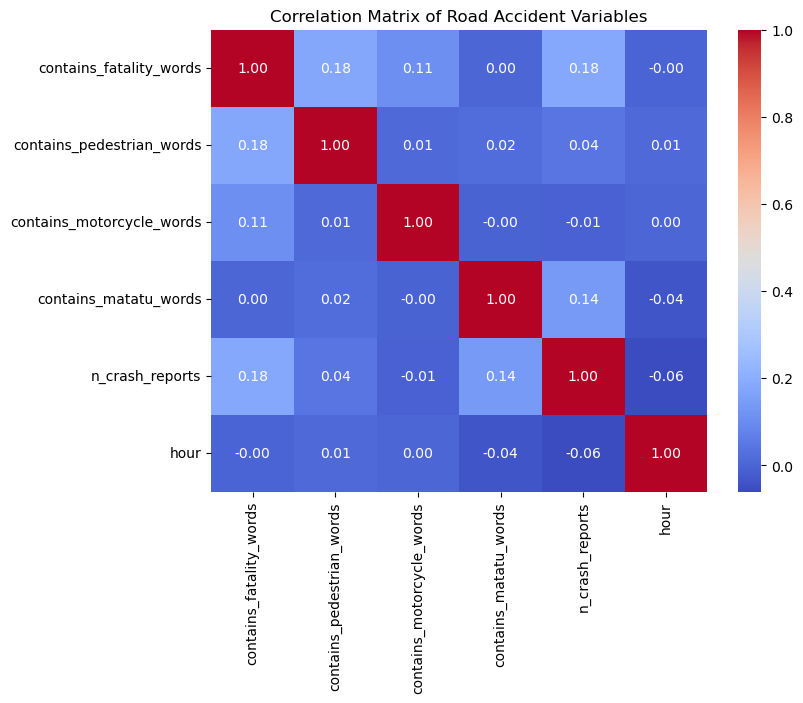

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Matrix of Road Accident Variables")
plt.show()


### PHASE 5: Temporal Analysis

Accidents by hour

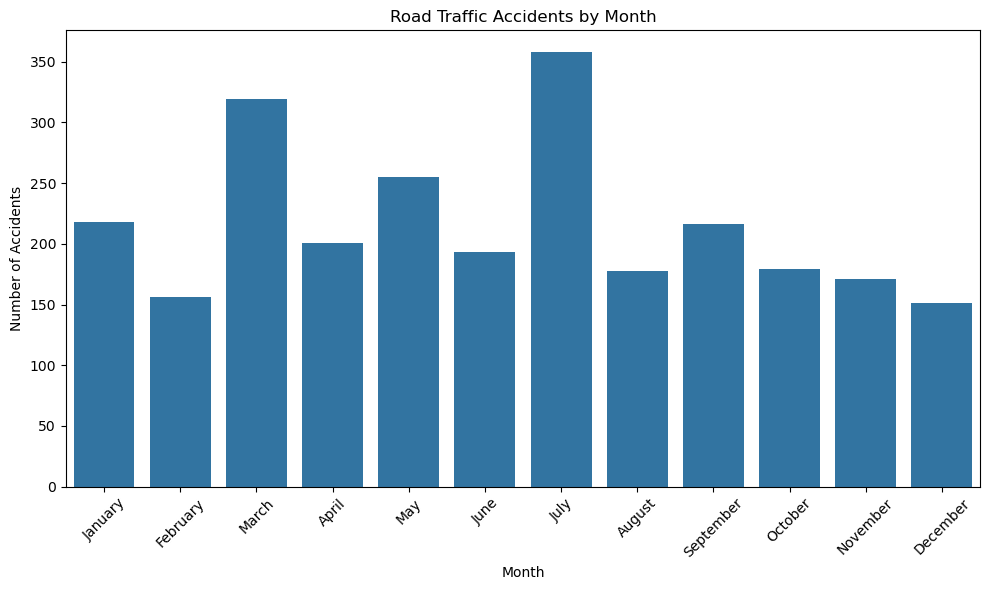

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Create a month name column
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

# Ensure correct month order
month_order = list(calendar.month_name)[1:]  # January to December

plt.figure(figsize=(10, 6))
sns.countplot(x='month_name', data=df, order=month_order)

plt.title("Road Traffic Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Accidents by day

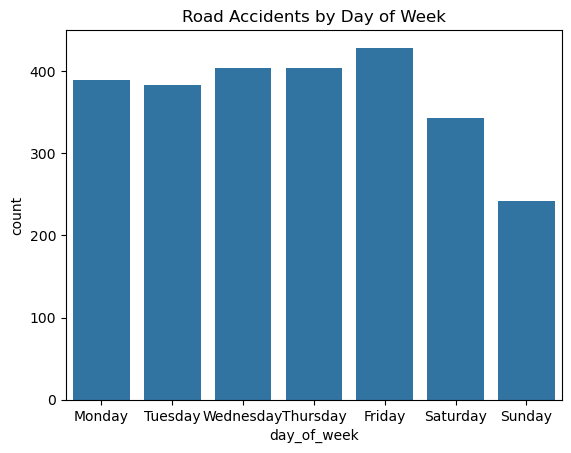

In [ ]:
plt.figure()
sns.countplot(x='day_of_week', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Road Accidents by Day of Week")
plt.show()


### PHASE 6: Severity & Risk Factor Analysis
Fatality vs road users

In [ ]:
pd.crosstab(df['contains_fatality_words'],
            df['contains_motorcycle_words'],
            normalize='columns') * 100


contains_motorcycle_words,0,1
contains_fatality_words,,
0,94.12,80.0
1,5.88,20.0


Fatalty vs Pedestrians

In [ ]:
pd.crosstab(df['contains_fatality_words'],
            df['contains_pedestrian_words'],
            normalize='columns') * 100


contains_pedestrian_words,0,1
contains_fatality_words,,
0,94.277822,65.57377
1,5.722178,34.42623


Fatality vs Matatus

In [ ]:
#import pandas as pd

#df = pd.read_csv('/mnt/data/824d9b24-e377-43ab-ad53-fe9cfd45a58b.csv')

# Filter only Matatu-related crashes
matatu_df = df[df['contains_matatu_words'] == 1]

# Count fatal vs non-fatal
matatu_severity_count = matatu_df['contains_fatality_words'].map({1: 'Fatal', 0: 'Non-Fatal'}).value_counts()

print("Matatu Crash Severity Counts:")
print(matatu_severity_count)

# Also show total Matatu crashes
print("\nTotal Matatu Crashes:", len(matatu_df))


Matatu Crash Severity Counts:
contains_fatality_words
Non-Fatal    195
Fatal         14
Name: count, dtype: int64

Total Matatu Crashes: 209


In [ ]:
#import pandas as pd

#df = pd.read_csv('/mnt/data/824d9b24-e377-43ab-ad53-fe9cfd45a58b.csv')

# Function to get severity counts for a road user
def severity_count(user_col, user_label):
    subset = df[df[user_col] == 1]
    counts = subset['contains_fatality_words'].map({1:'Fatal', 0:'Non-Fatal'}).value_counts()
    print(f"{user_label} Crash Severity Counts:")
    print(counts)
    print("Total", user_label, "Crashes:", len(subset), "\n")

# 🚐 Matatu
severity_count('contains_matatu_words', 'Matatu')

# 🚶 Pedestrian
severity_count('contains_pedestrian_words', 'Pedestrian')

# 🏍️ Motorcycle
severity_count('contains_motorcycle_words', 'Motorcycle')


Matatu Crash Severity Counts:
contains_fatality_words
Non-Fatal    195
Fatal         14
Name: count, dtype: int64
Total Matatu Crashes: 209 

Pedestrian Crash Severity Counts:
contains_fatality_words
Non-Fatal    40
Fatal        21
Name: count, dtype: int64
Total Pedestrian Crashes: 61 

Motorcycle Crash Severity Counts:
contains_fatality_words
Non-Fatal    76
Fatal        19
Name: count, dtype: int64
Total Motorcycle Crashes: 95 



In [ ]:
pd.crosstab(df['contains_fatality_words'],
            df['contains_matatu_words'],
            normalize='columns') * 100


contains_matatu_words,0,1
contains_fatality_words,,
0,93.629505,93.301435
1,6.370495,6.698565


### PHASE 7: Spatial (Hotspot) Analysis

Create accident map

In [ ]:
m = folium.Map(location=[df.latitude.mean(), df.longitude.mean()],
               zoom_start=7)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red' if row['contains_fatality_words'] == 1 else 'blue',
        fill=True
    ).add_to(m)

m


In [ ]:
!pip install contextily

In [ ]:
!pip install geopandas

In [ ]:
from folium.plugins import HeatMap


In [ ]:
# Create base map
m = folium.Map(
    location=[df['latitude'].mean(), df['longitude'].mean()],
    zoom_start=11,
    tiles='OpenStreetMap'
)

# Create heat data
heat_data = [[row['latitude'], row['longitude']] for _, row in df.iterrows()]

# Add heatmap
HeatMap(
    heat_data,
    radius=15,
    blur=20,
    max_zoom=13
).add_to(m)

# Save map
m.save("accident_hotspot_map.html")

### PHASE 8: Reporting Intensity Analysis

In [ ]:
df.groupby('contains_fatality_words')['n_crash_reports'].mean()


contains_fatality_words
0    1.468094
1    3.277108
Name: n_crash_reports, dtype: float64

Fatal crashes usually generate more reports

### PHASE 9:  Simple Predictive Model

Predict fatality likelihood:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['contains_pedestrian_words',
        'contains_matatu_words',
        'contains_motorcycle_words',
        'n_crash_reports']]

y = df['contains_fatality_words']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.926829268292683

 Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[
    ['contains_pedestrian_words',
     'contains_motorcycle_words',
     'contains_matatu_words',
     'n_crash_reports',
     'hour']
]

y = df['contains_fatality_words']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97       726
           1       1.00      0.02      0.04        53

    accuracy                           0.93       779
   macro avg       0.97      0.51      0.50       779
weighted avg       0.94      0.93      0.90       779



In [ ]:
import numpy as np

odds_ratios = pd.DataFrame({
    'Variable': X.columns,
    'Odds_Ratio': np.exp(log_model.coef_[0])
})

odds_ratios


,Variable,Odds_Ratio
0,contains_pedestrian_words,4.398553
1,contains_motorcycle_words,3.931076
2,contains_matatu_words,0.690084
3,n_crash_reports,1.159572
4,hour,0.999518


Interpretation

### Pedestrian Involvement
“Crashes involving pedestrians exhibited higher odds of being fatal, highlighting the vulnerability of pedestrians within the Kenyan road transport environment.”

### Motorcycle Involvement
“Motorcycle involvement significantly increased the likelihood of fatal outcomes, reflecting limited physical protection and increased exposure among motorcyclists.”

### Matatu Involvement
“Matatu involvement showed a weaker association with fatality, suggesting that vehicle size and passenger safety features may moderate crash severity.”

### Number of Crash Reports
“An increase in the number of crash reports was associated with higher odds of fatality, indicating that reporting intensity may serve as a proxy for crash severity.”

### Hour of Occurrence
“Time of occurrence demonstrated a relatively small effect on fatality likelihood, suggesting that crash severity is more strongly influenced by road user type than by time alone.”

### poisson regression

In [ ]:
import statsmodels.api as sm

X_pois = df[
    ['contains_fatality_words',
     'contains_pedestrian_words',
     'contains_motorcycle_words',
     'contains_matatu_words']
]

X_pois = sm.add_constant(X_pois)
y_pois = df['n_crash_reports']

poisson_model = sm.GLM(
    y_pois,
    X_pois,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        n_crash_reports   No. Observations:                 2595
Model:                            GLM   Df Residuals:                     2590
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4170.4
Date:                Wed, 24 Dec 2025   Deviance:                       2593.3
Time:                        12:56:17   Pearson chi2:                 5.47e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1458
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [ ]:
# Convert date
df['crash_date'] = pd.to_datetime(df['crash_date'])

# Create time features
df['day_of_week'] = df['crash_date'].dt.dayofweek
df['month'] = df['crash_date'].dt.month

# Rename road user indicators for clarity
df['pedestrian'] = df['contains_pedestrian_words']
df['motorcyclist'] = df['contains_motorcycle_words']
df['matatu'] = df['contains_matatu_words']

# Select model variables
df_model = df[[
    'contains_fatality_words',   # Binary outcome
    'pedestrian',
    'motorcyclist',
    'matatu',
    'latitude',
    'longitude',
    'day_of_week',
    'month'
]].dropna()

In [ ]:
y = df_model['contains_fatality_words']

X = df_model.drop('contains_fatality_words', axis=1)

# Add intercept
X = sm.add_constant(X)


In [ ]:
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

print(logit_results.summary())


Optimization terminated successfully.
         Current function value: 0.224020
         Iterations 7
                              Logit Regression Results                             
Dep. Variable:     contains_fatality_words   No. Observations:                 2595
Model:                               Logit   Df Residuals:                     2587
Method:                                MLE   Df Model:                            7
Date:                     Wed, 24 Dec 2025   Pseudo R-squ.:                 0.05776
Time:                             15:16:53   Log-Likelihood:                -581.33
converged:                            True   LL-Null:                       -616.97
Covariance Type:                 nonrobust   LLR p-value:                 8.181e-13
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.2710     16.734      1.331      0.183     -10

In [ ]:
# Odds Ratios and 95% CI
params = logit_results.params
conf = logit_results.conf_int()

odds_ratios = np.exp(params)
conf_odds = np.exp(conf)

or_table = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'CI Lower': conf_odds[0],
    'CI Upper': conf_odds[1]
})

print(or_table)



                Odds Ratio  CI Lower      CI Upper
const         4.700750e+09  0.000027  8.252654e+23
pedestrian    8.724355e+00  4.967960  1.532105e+01
motorcyclist  3.999201e+00  2.317615  6.900892e+00
matatu        9.943838e-01  0.552473  1.789771e+00
latitude      6.216475e-01  0.204917  1.885860e+00
longitude     4.968883e-01  0.197644  1.249206e+00
day_of_week   1.072588e+00  0.985078  1.167872e+00
month         9.675769e-01  0.919680  1.017969e+00


In [ ]:
# Predicted probabilities
df_model['pred_prob'] = logit_results.predict(X)

# Predicted classes
df_model['pred_class'] = (df_model['pred_prob'] >= 0.5).astype(int)

# Accuracy
accuracy = (df_model['pred_class'] == y).mean()
print("Classification Accuracy:", accuracy)


Classification Accuracy: 0.935645472061657


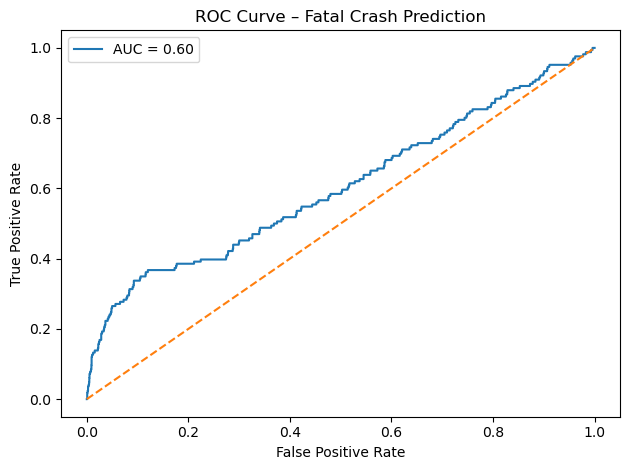

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y, df_model['pred_prob'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Fatal Crash Prediction")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#import pandas as pd
df['n_crash_reports'].mean(), df['n_crash_reports'].var()


(np.float64(1.583815028901734), 5.8637317776460485)

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

#df = pd.read_csv("accidents.csv")

# Convert Booleans to numeric
for col in ['contains_pedestrian_words','contains_matatu_words','contains_motorcycle_words','contains_fatality_words']:
    df[col] = df[col].astype(int)

# Convert day names to numbers
day_map = {
    'Monday':1, 'Tuesday':2, 'Wednesday':3,
    'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7
}
df['day_of_week'] = df['day_of_week'].map(day_map)

# Convert numeric columns
df['month'] = df['month'].astype(int)
df['hour'] = df['hour'].astype(int)

# Build Poisson regression model
poisson_model = smf.glm(
    formula="n_crash_reports ~ contains_pedestrian_words + contains_matatu_words + contains_motorcycle_words + hour + day_of_week + month",
    data=df,
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        n_crash_reports   No. Observations:                 2595
Model:                            GLM   Df Residuals:                     2588
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4265.9
Date:                Fri, 26 Dec 2025   Deviance:                       2784.2
Time:                        18:58:07   Pearson chi2:                 7.26e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08057
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
y = df['n_crash_reports']

X = df[
    [
        'contains_pedestrian_words',
        'contains_matatu_words',
        'contains_motorcycle_words',
        'hour',
        'day_of_week',
        'month'
    ]
]

X = sm.add_constant(X)


In [ ]:
nb_model = sm.GLM(
    y,
    X,
    family=sm.families.NegativeBinomial()
)

nb_results = nb_model.fit()
print(nb_results.summary())


c:\Users\leovo\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:        n_crash_reports   No. Observations:                 2595
Model:                            GLM   Df Residuals:                     2588
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4437.2
Date:                Fri, 26 Dec 2025   Deviance:                       701.68
Time:                        19:18:46   Pearson chi2:                 2.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02863
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:

print("Negative Binomial AIC:", nb_results.aic)


Negative Binomial AIC: 8888.431669068581


In [ ]:
import statsmodels.api as sm

X = df[['contains_pedestrian_words',
        'contains_matatu_words',
        'contains_motorcycle_words',
        'hour', 'day_of_week', 'month']]
X = sm.add_constant(X)
y = df['n_crash_reports']

poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()
nb = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

poisson.aic, nb.aic


c:\Users\leovo\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


(np.float64(8545.725738647212), np.float64(8888.431669068581))